# Introduction à Pandas

**Objectifs d'apprentissage :**
  * Introduction aux structures de données `DataFrame` et `Series` de la bibliothèque *Pandas*
  * Accéder aux données et les manipuler dans une structure `DataFrame` et `Series`
  * Importer des données d'un fichier CSV dans un `DataFrame` *Pandas*
  * Réindexer un `DataFrame` pour restructurer les données

 [*Pandas*](http://pandas.pydata.org/) est une API d'analyse de données orientée colonnes. C'est un excellent outil pour manipuler et analyser des données d'entrée. Beaucoup de frameworks d'apprentissage automatique en IA acceptent les structures de données *Pandas* en entrée.

La librairie pandas permet de manipuler de façon performantes et facile des données structurées, par exemple sous forme de tableau. elle met à notre disposition des fonctions qui permettent de trier, consolider, compléter vos données et de les exporter dans divers format (csv, latex, excel ...)

Pour une description plus complète, vous pouvez consulter le [site de documentation officielle de *Pandas*](http://pandas.pydata.org/pandas-docs/stable/index.html), sur lequel vous trouverez de multiples informations ainsi que de nombreux didacticiels.


 [NumPy](http://www.numpy.org/) est un kit d'outils de calculs scientifiques populaire. Les `Series` *Pandas* peuvent faire office d'arguments pour la plupart des fonctions NumPy :

 ## Concepts de base


In [33]:
#importer les libraries

import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)




1.5.3
1.24.4


* Création de DataFrames :
Les DataFrames sont des structures de données tabulaires bidimensionnelles. Vous pouvez les créer à partir de listes, de dictionnaires ou de fichiers CSV, Excel, etc.
 

In [4]:

data = {'Nom': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(data)

# un apreçu sur les données
df.head()
#df.tail()
#print(df.head())

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [5]:
data

{'Nom': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}

In [6]:
df['Nom']

0      Alice
1        Bob
2    Charlie
Name: Nom, dtype: object

In [7]:
type(df['Nom'])

pandas.core.series.Series

In [72]:
# Sélection de données :
print(type(df['Nom']))

colonne = df['Nom']
#equivalent à df.Nom

valeur = df.at[0, 'Nom']  # Accès à la valeur dans la première ligne et la colonne 'Nom'
valeur

<class 'pandas.core.series.Series'>


'Alice'

In [7]:
list.sort?

In [10]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If 

In [15]:
valeur = df.iat[1, 0]  # Accès à la valeur dans la première ligne et la première colonne

print(valeur)
valeur

Bob


'Bob'

In [9]:
lignes = df.loc[0:1]  # Sélectionne les lignes 0 et 1
lignes

,Nom,Age
0,Alice,25
1,Bob,30


In [21]:
# Selecting multi axis label + Slicing
df.loc[1:2, ['Age',"Nom"]]

,Age,Nom
1,30,Bob
2,35,Charlie


In [75]:
df[0:2]

,Nom,Age
0,Alice,25
1,Bob,30


In [29]:
selection = df.loc[0, 'Nom':'Age']  # Sélection des valeurs dans la première ligne, de 'Nom' à 'Age'
selection

Nom    Alice
Age       25
Name: 0, dtype: object

In [27]:
selection = df.iloc[2, 0:1]  # Sélection des valeurs dans la première ligne, de la première à la deuxième colonne
selection

Nom    Charlie
Name: 2, dtype: object

In [57]:
df.iloc(0)

 *Pandas* propose en outre une API extrêmement riche, avec des fonctions avancées d'[indexation ](http://pandas.pydata.org/pandas-docs/stable/indexing.html) et [de sélection](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) basées sur les méthodes .at, .iat, .loc et .iloc.

In [10]:
df

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [13]:
# Filtrage de données

adultes = df[df['Age'] >= 30]
adultes

,Nom,Age
1,Bob,30
2,Charlie,35


In [21]:
# Ajout de colonnes
df['Ville'] = ['Paris', 'Londres', 'New York']
df.head()

,Nom,Age,Ville
0,Alice,25,Paris
1,Bob,30,Londres
2,Charlie,35,New York


In [32]:
# fonctions de calculs et d'agrégation :mean(),max(),min(),sum(),count()
moyenne_age = df['Age'].mean()
moyenne_age

30.0

In [27]:
#Suppression de colonnes ou de lignes

df.drop('Age', axis=1, inplace=True)  # Supprime la colonne 'Âge'
df.head()

,Nom
0,Alice
2,Charlie


In [23]:
df=df.drop(1)
df.head()

,Nom,Ville
0,Alice,Paris
2,Charlie,New York


In [25]:
pd.DataFrame.drop?

## Manipulation de données :

### Lecture et prise en main d'un dataset: 

Pandas prend en charge la lecture et l'écriture de données depuis/vers des fichiers, notamment CSV, Excel, SQL, etc.
 

La référence est tjrs la documentation officielle de Pandas (https://pandas.pydata.org/pandas-docs/stable/). 

In [31]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()
#california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [41]:
california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [42]:
california_housing_dataframe.index

RangeIndex(start=0, stop=17000, step=1)

In [43]:
california_housing_dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [45]:
california_housing_dataframe.sort_index(axis=1, ascending=False)

,total_rooms,total_bedrooms,population,median_income,median_house_value,longitude,latitude,housing_median_age,households
0,5612.0,1283.0,1015.0,1.4936,66900.0,-114.31,34.19,15.0,472.0
1,7650.0,1901.0,1129.0,1.8200,80100.0,-114.47,34.40,19.0,463.0
2,720.0,174.0,333.0,1.6509,85700.0,-114.56,33.69,17.0,117.0
3,1501.0,337.0,515.0,3.1917,73400.0,-114.57,33.64,14.0,226.0
4,1454.0,326.0,624.0,1.9250,65500.0,-114.57,33.57,20.0,262.0
...,...,...,...,...,...,...,...,...,...
16995,2217.0,394.0,907.0,2.3571,111400.0,-124.26,40.58,52.0,369.0
16996,2349.0,528.0,1194.0,2.5179,79000.0,-124.27,40.69,36.0,465.0
16997,2677.0,531.0,1244.0,3.0313,103600.0,-124.30,41.84,17.0,456.0
16998,2672.0,552.0,1298.0,1.9797,85800.0,-124.30,41.80,19.0,478.0


In [46]:
california_housing_dataframe.sort_values(by="median_house_value")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0
16643,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0
16801,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0
3226,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0
7182,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0
...,...,...,...,...,...,...,...,...,...
15834,-122.42,37.81,52.0,1314.0,317.0,473.0,250.0,4.3472,500001.0
7927,-118.40,33.87,38.0,2398.0,431.0,911.0,392.0,5.2319,500001.0
3546,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,500001.0
7924,-118.40,33.88,35.0,1060.0,191.0,444.0,196.0,8.0015,500001.0


In [47]:
california_housing_dataframe['housing_median_age'].unique()

array([15., 19., 17., 14., 20., 29., 25., 41., 34., 46., 16., 21., 48.,
       31., 28., 24., 18., 30., 32., 23., 38., 35., 33., 13., 11., 10.,
        6., 12., 27., 22.,  5.,  8., 37.,  3., 44.,  2., 26.,  9.,  7.,
       36.,  4., 52., 40., 43., 42., 39., 49., 47., 50., 45., 51.,  1.])

In [48]:
california_housing_dataframe.nunique()

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

In [49]:
california_housing_dataframe['housing_median_age'].nunique()

52

In [50]:
california_housing_dataframe["housing_median_age"].value_counts()

52.0    1052
36.0     715
35.0     692
16.0     635
17.0     576
34.0     567
33.0     513
26.0     503
18.0     478
25.0     461
32.0     458
37.0     437
15.0     416
19.0     412
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
20.0     383
23.0     382
29.0     374
21.0     373
14.0     347
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
13.0     249
40.0     249
45.0     235
41.0     232
10.0     226
11.0     208
5.0      199
46.0     196
12.0     192
8.0      178
47.0     175
9.0      172
4.0      161
7.0      151
48.0     135
6.0      129
50.0     112
49.0     111
2.0       49
3.0       46
51.0      32
1.0        2
Name: housing_median_age, dtype: int64

In [51]:
def times2(x):
    return x*2

In [52]:
california_housing_dataframe["double"]=california_housing_dataframe['housing_median_age'].apply(times2)
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,double
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,30.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,38.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,34.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,28.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,40.0


In [53]:
california_housing_dataframe['housing_median_age'].sum()

486019.0

In [54]:
del california_housing_dataframe["double"]
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [55]:
california_housing_dataframe.to_csv("test.csv")

à lire: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html 

### Traitement des valeurs manquantes:

*Pandas* peut ajouter automatiquement des valeurs manquantes. Mais on peut aussi indiquer explicitement des valeurs manquantes. 

Trois valeurs correspondant à trois types peuvent indiquer des valeurs manquantes :

-   `nan` (du module `numpy` par exemple) pour toutes les valeurs
    numériques
-   `None` pour les objets en général
-   `NaT` (Not a Time, du module `pandas`) pour les dates

On peut tester une valeur est manquante avec la fonction `isnull` :

In [77]:
print(pd.isnull(np.nan), pd.isnull(None), pd.isnull(pd.NaT))

True True True


In [39]:
city_names = pd.Series(['Paris', 'Lille', 'Toulouse'])
population = pd.Series([852469, 1015785, 485199])

cities = pd.DataFrame({ 'City_name': city_names, 'Population': population })
cities.head()

,City_name,Population
0,Paris,852469
1,Lille,1015785
2,Toulouse,485199


In [40]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities.loc[0:1, "year"] = 2000
cities

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0
2,Toulouse,485199,97.92,4955.055147,NaN


In [41]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_name           3 non-null      object 
 1   Population          3 non-null      int64  
 2   Area square miles   3 non-null      float64
 3   Population density  3 non-null      float64
 4   year                2 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 248.0+ bytes


In [91]:
cities.dropna(how="any")

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0


In [92]:
pd.isna(cities)

,City_name,Population,Area square miles,Population density,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True


In [93]:
cities.isnull()

,City_name,Population,Area square miles,Population density,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True


In [94]:
# Détection de valeurs manquantes
cities.isnull().sum()

City_name             0
Population            0
Area square miles     0
Population density    0
year                  1
dtype: int64

In [95]:
cities= cities.fillna(value=2001)
cities

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0
2,Toulouse,485199,97.92,4955.055147,2001.0


 Appelez `DataFrame.reindex` pour réorganiser manuellement les lignes. Le code suivant, par exemple, revient à trier les données par nom de ville :

In [96]:
cities.reindex([2, 0, 1])

,City_name,Population,Area square miles,Population density,year
2,Toulouse,485199,97.92,4955.055147,2001.0
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0


 La réindexation est un excellent moyen de mélanger (organiser aléatoirement) les données d'un `DataFrame`. Dans l'exemple ci-dessous, l'index de type tableau est transmis à la fonction NumPy `random.permutation`, qui mélange les valeurs. En appelant `reindex` avec ce tableau mélangé, nous mélangeons également les lignes du `DataFrame`.
Exécutez plusieurs fois la cellule suivante !

 Pour en savoir plus, consultez la [documentation relative aux index](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

### Les series

Il est possible d'effectuer des opérations arithmétiques de base de Python sur les Series. Par exemple :

In [65]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [66]:
print(type(population))

<class 'pandas.core.series.Series'>


 [NumPy](http://www.numpy.org/) est un kit d'outils de calculs scientifiques populaire. Les `Series` *Pandas* peuvent faire office d'arguments pour la plupart des fonctions NumPy :

In [ ]:
import numpy as np

np.log(population)

 La méthode `Series.apply` convient pour les transformations à une colonne plus complexes. Comme la [fonction `map`](https://docs.python.org/2/library/functions.html#map) de Python, elle accepte en argument une [fonction `lambda`](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), appliquée à chaque valeur.

L'exemple ci-dessous permet de créer une `Series` signalant si la `population` dépasse ou non un million d'habitants :

In [13]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 
La modification des `DataFrames` est plutôt simple. 

Exemple: ajouter deux `Series` à un `DataFrame` existant 

In [7]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities.loc[0:1, "year"] = 2000
cities

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0
2,Toulouse,485199,97.92,4955.055147,NaN


### GroupBY

La méthode groupby() de Pandas permet de regrouper les données en fonction des valeurs d'une ou plusieurs colonnes. Vous pouvez ensuite appliquer des opérations d'agrégation sur chaque groupe.

In [39]:
import pandas as pd

# Create a sample sales DataFrame
data = {'Product': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
        'Sales': [100, 200, 150, 300, 250, 120, 400]}

sales_df = pd.DataFrame(data)

sales_df.head()

,Product,Sales
0,A,100
1,B,200
2,A,150
3,C,300
4,B,250


In [40]:
# Grouper les données par la colonne 'Product' et calculer le total des ventes
grouped_data = sales_df.groupby('Product')['Sales'].sum()

# Display the total sales for each product
grouped_data


Product
A    370
B    450
C    700
Name: Sales, dtype: int64

### Concatenation

La fonction concat() de Pandas permet de concaténer deux ou plusieurs DataFrames le long d'un axe spécifié (par exemple, les lignes ou les colonnes).

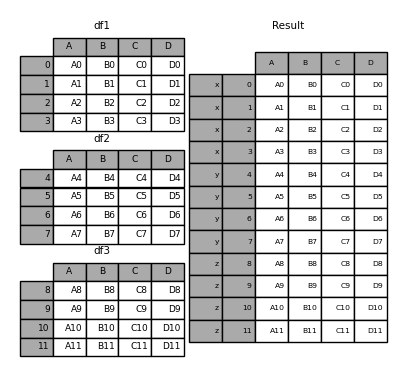

In [42]:
# Créez deux DataFrames
df1 = california_housing_dataframe[:100]
df2 = california_housing_dataframe[100:200]

# Concaténez les DataFrames le long des lignes
resultat = pd.concat([df1, df2], axis=0)
resultat


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
195,-116.38,34.20,14.0,4985.0,1238.0,2517.0,954.0,2.0674,65000.0
196,-116.38,34.10,6.0,2104.0,348.0,841.0,320.0,4.1458,116300.0
197,-116.38,33.74,7.0,17579.0,3479.0,3581.0,1820.0,4.0840,194500.0
198,-116.38,33.73,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,134500.0


à lire: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


### Merge

La méthode merge() de Pandas permet de fusionner (ou joindre) deux DataFrames en fonction d'une ou plusieurs colonnes communes.

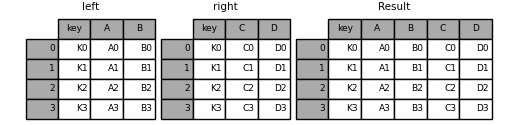

In [43]:
# Créez deux DataFrames avec des colonnes 'ville' en commun
df1 = pd.DataFrame({'ville': ['Los Angeles', 'San Francisco', 'San Diego'],
                    'population': [4000000, 800000, 1400000]})
df2 = pd.DataFrame({'ville': ['Los Angeles', 'San Francisco', 'San Jose'],
                    'revenu_moyen': [60000, 80000, 75000]})

# Fusionnez les DataFrames sur la colonne 'ville'
resultat = pd.merge(df1, df2, on='ville')
resultat


,ville,population,revenu_moyen
0,Los Angeles,4000000,60000
1,San Francisco,800000,80000


In [44]:
df1

,ville,population
0,Los Angeles,4000000
1,San Francisco,800000
2,San Diego,1400000


In [45]:
df2

,ville,revenu_moyen
0,Los Angeles,60000
1,San Francisco,80000
2,San Jose,75000


Here is a more complicated example with multiple join keys. Only the keys appearing in left and right are present (the intersection), since how='inner' by default.

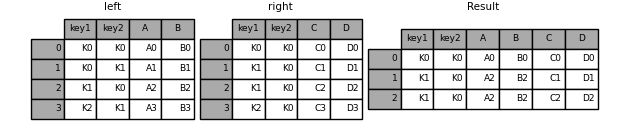

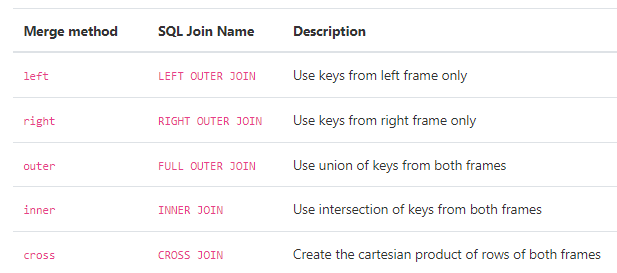

Il existe quatre types de merge avec pd.merge() , suivant  how (left, right, inner, outer).

- La fusion left conserve toutes les lignes du DataFrame de gauche (df1), en utilisant les index comme clé de fusion.
- La fusion right conserve toutes les lignes du DataFrame de droite (df2), en utilisant les index comme clé de fusion.
- La fusion inner conserve uniquement les lignes avec des index communs dans les deux DataFrames.
- La fusion outer conserve toutes les lignes des deux DataFrames, remplissant les valeurs manquantes avec NaN si nécessaire.





In [32]:
import pandas as pd

# Création des DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3, 4],
                    'Nom': ['Alice', 'Bob', 'Charlie', 'David']})

df2 = pd.DataFrame({'ID': [2, 3, 4, 5],
                    'Département': ['RH', 'Finance', 'IT', 'Ventes']})

# Affichage des DataFrames
print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
df2.head()



DataFrame 1:
   ID      Nom
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David

DataFrame 2:


,ID,Département
0,2,RH
1,3,Finance
2,4,IT
3,5,Ventes


In [29]:
# Fusion Left (gauche)
left_merge = pd.merge(df1, df2, how='left', on='ID')

print("jointure gauche:")
left_merge


jointure gauche:


,ID,Nom,Département
0,1,Alice,NaN
1,2,Bob,RH
2,3,Charlie,Finance
3,4,David,IT


In [30]:
# Fusion Right (droite)
right_merge = pd.merge(df1, df2, how='right', on='ID')

print("\n Jointure droite:")
right_merge



 Jointure droite:


,ID,Nom,Département
0,2,Bob,RH
1,3,Charlie,Finance
2,4,David,IT
3,5,NaN,Ventes


In [31]:
# Fusion Inner (interne)
inner_merge = pd.merge(df1, df2, how='inner', on='ID')

print("\nJointure interne:")
inner_merge




Jointure interne:


,ID,Nom,Département
0,2,Bob,RH
1,3,Charlie,Finance
2,4,David,IT


In [32]:
# Fusion Outer (externe)
outer_merge = pd.merge(df1, df2, how='outer', on='ID')

print("\nOuter Merge:")
outer_merge



Outer Merge:


,ID,Nom,Département
0,1,Alice,NaN
1,2,Bob,RH
2,3,Charlie,Finance
3,4,David,IT
4,5,NaN,Ventes


### LA Jointure

La méthode join() de Pandas est similaire à merge(), mais elle est utilisée pour joindre deux DataFrames en utilisant l'index plutôt que des colonnes.

In [14]:
# Créez deux DataFrames avec un index en commun
df11 = pd.DataFrame({'population': [4000000, 800000, 1400000]}, index=['Los Angeles', 'San Francisco', 'San Diego'])
df22 = pd.DataFrame({'revenu_moyen': [60000, 80000, 75000]}, index=['Los Angeles', 'San Francisco', 'San Jose'])

# Joignez les DataFrames en utilisant l'index
resultat = df1.join(df2, how='inner')
resultat


,population,revenu_moyen
Los Angeles,4000000,60000
San Francisco,800000,80000


In [33]:
#2me exemple avec df1 et df2 des noms et departements
df1.head()

,ID,Nom
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David


In [34]:
df2.head()

,ID,Département
0,2,RH
1,3,Finance
2,4,IT
3,5,Ventes


In [35]:
# Utilisation de la méthode .join() en spécifiant la colonne 'ID' comme clé de jointure
resultat = df1.set_index('ID').join(df2.set_index('ID'), how='left')
resultat

,Nom,Département
ID,,
1,Alice,NaN
2,Bob,RH
3,Charlie,Finance
4,David,IT


In [36]:
resultat = df1.set_index('ID').join(df2.set_index('ID'), how='right')
resultat

,Nom,Département
ID,,
2,Bob,RH
3,Charlie,Finance
4,David,IT
5,NaN,Ventes


In [37]:
resultat = df1.set_index('ID').join(df2.set_index('ID'), how='inner')
resultat

,Nom,Département
ID,,
2,Bob,RH
3,Charlie,Finance
4,David,IT


In [38]:
resultat = df1.set_index('ID').join(df2.set_index('ID'), how='outer')
resultat

,Nom,Département
ID,,
1,Alice,NaN
2,Bob,RH
3,Charlie,Finance
4,David,IT
5,NaN,Ventes


## Data Wrangling /Preprocessing

C'est le processus de nettoyage, de transformation et de préparation des données brutes en données utilisables pour l'analyse ou la modélisation 

Récapitulons les techniques/opérations de Préparation de données :

1. **Chargement de données** :
   - Charger des données à partir de fichiers CSV, Excel, bases de données ou autres sources.
   - Utiliser `pd.read_csv()`, `pd.read_excel()`, `pd.read_sql()`, etc.



In [ ]:
import pandas as pd

# Exemple générique de lecture d'un fichier CSV avec plusieurs arguments

# Chemin vers le fichier CSV
csv_file = 'mon_fichier.csv'

# Délimiteur personnalisé (par exemple, une tabulation)
delimiter = '\t'

# Caractère d'encapsulation (pour les champs textuels contenant le délimiteur)
quotechar = '"'

# Ignorer des lignes au début du fichier (par exemple, les en-têtes)
skiprows = 1

# Utiliser une colonne spécifique comme index (par exemple, la colonne 'ID')
index_col = 'ID'

# Convertir des valeurs nulles (par exemple, 'N/A' ou 'NA') en NaN
na_values = ['N/A', 'NA']

# Noms de colonnes personnalisés
names = ['Colonne1', 'Colonne2', 'Colonne3']

# Type de données personnalisé pour certaines colonnes
dtype = {'Colonne2': float, 'Colonne3': str}

# Lire le fichier CSV avec les arguments spécifiés
df = pd.read_csv(csv_file, 
                 delimiter=delimiter, 
                 quotechar=quotechar, 
                 skiprows=skiprows, 
                 index_col=index_col, 
                 na_values=na_values, 
                 names=names, 
                 dtype=dtype)

# Afficher le DataFrame résultant
print(df)


2. **Sélection de colonnes** :
   - Sélectionner uniquement les colonnes pertinentes pour votre analyse.
   - Utiliser `df[['colonne1', 'colonne2']]` pour sélectionner les colonnes spécifiques.

3. **Filtrage de données** :
   - Filtrer les lignes en fonction de certaines conditions.
   - Utiliser des expressions conditionnelles comme `df[df['colonne'] > 10]` pour sélectionner les lignes où la colonne est supérieure à 10.

4. **Suppression de lignes ou de colonnes** :
   - Supprimer des lignes ou des colonnes inutiles ou problématiques.
   - Utiliser `df.drop()` pour supprimer des lignes ou `df.drop(columns=['colonne'])` pour supprimer des colonnes.



In [ ]:
import pandas as pd

# Création d'un DataFrame de test
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, 11, 12]}

df = pd.DataFrame(data)

# Affichage du DataFrame original
print("DataFrame original :")
print(df)

# Supprimer une colonne (par exemple, 'B')
df.drop('B', axis=1, inplace=True)

# Affichage du DataFrame après la suppression de la colonne 'B'
print("\nDataFrame après la suppression de la colonne 'B' :")
print(df)

# Supprimer une ligne (par exemple, la première ligne)
df.drop(0, axis=0, inplace=True)

# Affichage du DataFrame après la suppression de la première ligne
print("\nDataFrame après la suppression de la première ligne :")
print(df)


5. **Traitement des valeurs manquantes et les doublons** :
   - Gérer les valeurs manquantes en les remplissant ou en les supprimant.
   - Utiliser `df.fillna()` pour remplir les valeurs manquantes ou `df.dropna()` pour supprimer les lignes avec des valeurs manquantes.
   - Utiliser `df.duplicated()` pour vérifier les lignes en double



In [3]:
import pandas as pd

# Création d'un DataFrame de test
data = {'A': [1, 2, 2, 3, 4],
        'B': ['apple', 'banana', 'banana', 'cherry', 'date']}

df = pd.DataFrame(data)

# Affichage du DataFrame original
print("DataFrame original :")
print(df)

# Vérifier les lignes en double dans le DataFrame
duplicates = df.duplicated()

# Affichage du masque booléen indiquant les duplicatas
print("\nMasque booléen indiquant les lignes en double :")
print(duplicates)

# Sélectionner les lignes en double dans le DataFrame
duplicated_rows = df[duplicates]

# Affichage des lignes en double
print("\nLignes en double :")
print(duplicated_rows)


DataFrame original :
   A       B
0  1   apple
1  2  banana
2  2  banana
3  3  cherry
4  4    date

Masque booléen indiquant les lignes en double :
0    False
1    False
2     True
3    False
4    False
dtype: bool

Lignes en double :
   A       B
2  2  banana


6. **Renommage de colonnes** :
   - Renommer les colonnes pour des noms plus significatifs.
   - Utiliser `df.rename(columns={'ancien_nom': 'nouveau_nom'})` pour renommer des colonnes.

7. **Conversion de types de données** :
   - Convertir les types de données des colonnes en fonction de vos besoins.
   - Utiliser `df.astype()` pour convertir les types de données.


In [1]:
import pandas as pd

# Création d'un DataFrame de test
data = {'A': [1, 2, 3, 4],
        'B': [5.1, 6.2, 7.3, 8.4],
        'C': ['9', '10', '11', '12']}

df = pd.DataFrame(data)

# Affichage du DataFrame original avec les types de données
print("DataFrame original avec types de données :")
print(df.dtypes)

# Convertir le type de données de la colonne 'A' en float
df['A'] = df['A'].astype(float)

# Convertir le type de données de la colonne 'C' en int
df['C'] = df['C'].astype(int)

# Affichage du DataFrame après la conversion des types de données
print("\nDataFrame après la conversion des types de données :")
print(df.dtypes)


DataFrame original avec types de données :
A      int64
B    float64
C     object
dtype: object

DataFrame après la conversion des types de données :
A    float64
B    float64
C      int32
dtype: object



8. **Agrégation de données** :
   - Agréger les données en fonction de certaines colonnes pour obtenir des statistiques récapitulatives.
   - Utiliser `df.groupby()` suivi de fonctions d'agrégation comme `mean()`, `sum()`, etc.

9. **Combinaison de DataFrames** :
   - Combinez plusieurs DataFrames en utilisant des opérations de concaténation ou de fusion (merge/join).
   - Utiliser `pd.concat()` pour concaténer et `pd.merge()` pour fusionner.

10. **Création de nouvelles colonnes** :
    - Créer de nouvelles colonnes dérivées à partir des données existantes.
    - Utiliser `df['nouvelle_colonne'] = ...` pour créer de nouvelles colonnes.

11. **Réindexation** :
    - Réorganiser l'index des lignes pour une meilleure organisation.
    - Utiliser `df.set_index()` pour définir un nouvel index.

12. **Tri de données** :
    - Triez les données en fonction de certaines colonnes.
    - Utiliser `df.sort_values()` pour trier les données.



In [2]:
import pandas as pd

# Création d'un DataFrame de test
data = {'A': [3, 1, 2, 4],
        'B': [8, 6, 7, 5],
        'C': ['apple', 'banana', 'cherry', 'date']}

df = pd.DataFrame(data)

# Affichage du DataFrame original
print("DataFrame original :")
print(df)

# Trier le DataFrame en fonction des valeurs de la colonne 'A' par ordre croissant
df_sorted_A = df.sort_values(by='A')

# Affichage du DataFrame trié par la colonne 'A'
print("\nDataFrame trié par la colonne 'A' :")
print(df_sorted_A)

# Trier le DataFrame en fonction des valeurs de la colonne 'B' par ordre décroissant
df_sorted_B_desc = df.sort_values(by='B', ascending=False)

# Affichage du DataFrame trié par la colonne 'B' par ordre décroissant
print("\nDataFrame trié par la colonne 'B' par ordre décroissant :")
print(df_sorted_B_desc)

# Trier le DataFrame en fonction des valeurs de la colonne 'C' par ordre alphabétique
df_sorted_C = df.sort_values(by='C')

# Affichage du DataFrame trié par la colonne 'C'
print("\nDataFrame trié par la colonne 'C' :")
print(df_sorted_C)


DataFrame original :
   A  B       C
0  3  8   apple
1  1  6  banana
2  2  7  cherry
3  4  5    date

DataFrame trié par la colonne 'A' :
   A  B       C
1  1  6  banana
2  2  7  cherry
0  3  8   apple
3  4  5    date

DataFrame trié par la colonne 'B' par ordre décroissant :
   A  B       C
0  3  8   apple
2  2  7  cherry
1  1  6  banana
3  4  5    date

DataFrame trié par la colonne 'C' :
   A  B       C
0  3  8   apple
1  1  6  banana
2  2  7  cherry
3  4  5    date


13. **Échantillonnage de données** :
    - Échantillonnez des données aléatoirement pour une analyse ou une modélisation.
    - Utiliser `df.sample()` pour échantillonner des données.

Ces exemples de data wrangling ne couvrent qu'une petite partie des techniques possibles. En fonction de vos besoins spécifiques et de la complexité de vos données, vous pouvez utiliser diverses méthodes de Pandas pour préparer et nettoyer vos données en vue d'une analyse ou d'une modélisation efficace.

##  L'analyse exploratoire des données (EDA) 

C'est une étape cruciale dans le processus d'analyse de données, qui sert principalement à la prise en main et à la compréhension de vos données :

L'EDA vous permet de découvrir des tendances, des motifs, des relations, et des informations pertinentes sur vos données, ce qui est essentiel pour prendre des décisions éclairées pour un data Analyst.

Exemples d'opérations:

1. **Chargement des données** :
   - Chargez vos données à partir de sources telles que des fichiers CSV, des bases de données, ou des API.

2. **Aperçu des données** :
   - Consultez les premières lignes du jeu de données avec `df.head()` pour avoir un aperçu des données.

3. **Informations sur les données** :
   - Utilisez `df.info()` pour obtenir des informations sur les types de données, les valeurs manquantes, et le nombre total d'entrées.

4. **Statistiques descriptives** :
   - Utilisez `df.describe()` pour obtenir des statistiques descriptives telles que la moyenne, l'écart-type, le minimum, le maximum, etc., pour les colonnes numériques.

5. **Visualisations** :
   - Créez des visualisations telles que des histogrammes, des boîtes à moustaches (box plots), des diagrammes en barres, des diagrammes de dispersion, etc., pour mieux comprendre la distribution des données.

6. **Gestion des valeurs manquantes** :
   - Identifiez et traitez les valeurs manquantes avec des méthodes telles que `df.isnull()`, `df.fillna()`, ou `df.dropna()`.

7. **Analyse de la distribution** :
   - Examinez la distribution des données pour identifier les tendances, les valeurs aberrantes (outliers), et les anomalies.

8. **Corrélations** :
   - Calculez les corrélations entre les variables avec `df.corr()` pour comprendre les relations entre les variables.

9. **Groupement de données** :
   - Utilisez `df.groupby()` pour regrouper les données en fonction de certaines colonnes et effectuer des analyses spécifiques à ces groupes.

10. **Transformation de données** :
    - Appliquez des transformations telles que la normalisation, la standardisation, ou la création de nouvelles fonctionnalités en fonction des besoins.

11. **Tests statistiques** :
    - Effectuez des tests statistiques pour valider des hypothèses ou détecter des différences significatives entre les groupes.

12. **Résumé et rapports** :
    - Résumez les principales conclusions et insights dans des rapports ou des visualisations pour communiquer vos résultats.

13. **Itération** :
    - L'EDA est souvent un processus itératif. Vous pouvez revenir en arrière, explorer davantage, et affiner votre analyse à mesure que vous découvrez de nouvelles informations.

14. **Documentation** :
    - Documentez vos étapes d'EDA, vos décisions de nettoyage des données, et vos résultats pour assurer la reproductibilité de votre analyse.

15. **Visualisation interactive** :
    - Utilisez des bibliothèques de visualisation interactives comme Matplotlib, Seaborn, ou Plotly pour explorer davantage vos données.

16. **Interprétation** :
    - Interprétez les résultats de votre EDA en fonction du contexte de votre problème et de vos objectifs d'analyse.



## Ressources Utiles:

https://www.kaggle.com/learn/pandas